<a href="https://colab.research.google.com/github/Schollera/MAT421/blob/main/MAT421_HW11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sohan Chollera

HW#11 | MAT421

Module H

In [2]:
import numpy as np

a = 3.0000001
b = 3.0000000

# Subtract
direct = a-b

# Calculation that exaggerates error
bad_way = (a**2-b**2) / (a + b)  # Should be same as a-b

print("Accurate subtraction:       ", direct)
print("Subtraction via identity:  ", bad_way)

Accurate subtraction:        9.999999983634211e-08
Subtraction via identity:   9.999999979800256e-08


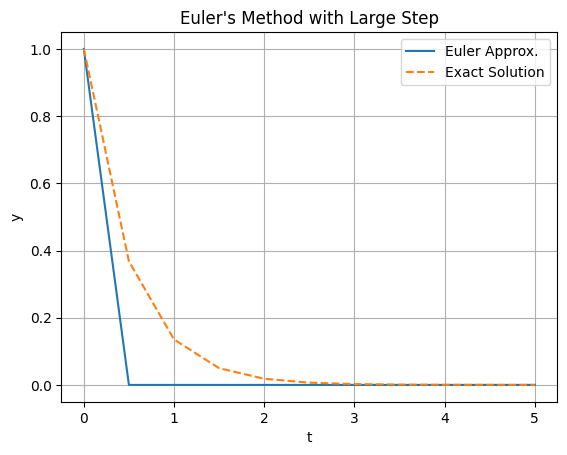

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def f(t, y):
    return -2*y  # Exponential decay

def euler(f, y0,t):
    y = [y0]
    for i in range(1,len(t)):
        y.append(y[-1] + (t[i] - t[i-1]) * f(t[i-1], y[-1]))
    return np.array(y)

t = np.linspace(0, 5, 11)  # Step size large for intentional purposes
y = euler(f, 1, t)

plt.plot(t, y, label="Euler Approx.")
plt.plot(t,np.exp(-2*t), label="Exact Solution", linestyle="--")
plt.title("Euler's method with large step")
plt.xlabel("t")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

In [4]:
def f(t, y):
    return y+t  # ODE: dy/dt = y + t

def heun(f,y0,t):
    y = [y0]
    h = t[1] - t[0]
    for i in range(1, len(t)):
        y_pred = y[-1] + h * f(t[i-1], y[-1])  # Euler step
        y_corr = y[-1] + h * 0.5 * (f(t[i-1], y[-1]) + f(t[i], y_pred))  # Corrected step
        y.append(y_corr)
    return np.array(y)

t = np.linspace(0,2,11)
y = heun(f,1,t)

for ti, yi in zip(t,y):
    print(f"t={ti:.2f}, y={yi:.4f}")

t=0.00, y=1.0000
t=0.20, y=1.2400
t=0.40, y=1.5768
t=0.60, y=2.0317
t=0.80, y=2.6307
t=1.00, y=3.4054
t=1.20, y=4.3946
t=1.40, y=5.6454
t=1.60, y=7.2154
t=1.80, y=9.1748
t=2.00, y=11.6093


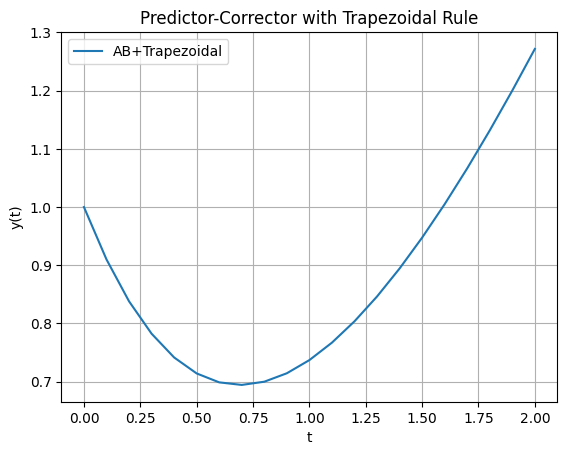

In [5]:
def f(t, y):
    return t-y  # dy/dt = t - y

def ab_pc(f,y0,t):
    y = [y0]
    h = t[1] - t[0]
    for i in range(1,len(t)):
        y_pred = y[-1] + h * f(t[i-1], y[-1])  # Predictor (Euler)
        y_corr = y[-1] + h * 0.5 * (f(t[i-1], y[-1]) + f(t[i], y_pred))  # Corrector
        y.append(y_corr)
    return np.array(y)

t = np.linspace(0,2,21)
y = ab_pc(f,1,t)

import matplotlib.pyplot as plt
plt.plot(t, y, label="AB+Trapezoidal")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.title("Predictor-corrector with Trapezoidal Rule")
plt.grid(True)
plt.legend()
plt.show()